In [7]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Sebastian Novoa Ortiz
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



--- 1. Calculo de la Primera Derivada f'(pi/8) ---
Valor exacto de f'(0.393) = -0.382683

Convergencia del error al variar h:
h = 0.10000 | f'(x) aprox = -0.382682 | Error = 1.27e-06
h = 0.04642 | f'(x) aprox = -0.382683 | Error = 5.92e-08
h = 0.02154 | f'(x) aprox = -0.382683 | Error = 2.75e-09
h = 0.01000 | f'(x) aprox = -0.382683 | Error = 1.28e-10
h = 0.00464 | f'(x) aprox = -0.382683 | Error = 5.92e-12
h = 0.00215 | f'(x) aprox = -0.382683 | Error = 2.90e-13
h = 0.00100 | f'(x) aprox = -0.382683 | Error = 2.09e-14
h = 0.00046 | f'(x) aprox = -0.382683 | Error = 8.86e-14
h = 0.00022 | f'(x) aprox = -0.382683 | Error = 2.68e-13
h = 0.00010 | f'(x) aprox = -0.382683 | Error = 2.47e-13


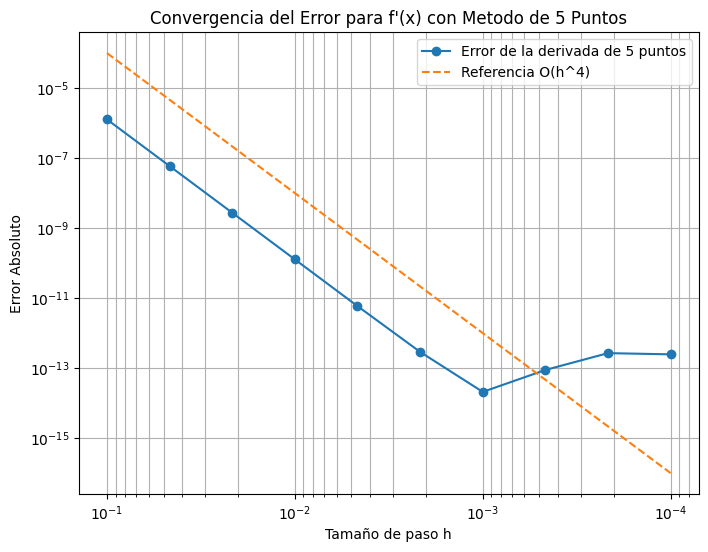


--- 2. Calculo de la Segunda Derivada f''(pi/8) ---
Valor exacto de f''(0.393) = -0.923880
Para h = 0.05, el valor aproximado de f''(x) es: -0.923879
El error de la aproximacion es: 6.41e-08

¿Mejorara con un h menor o mayor?
Respuesta: El error mejorara (disminuira) con un 'h' mas pequeño, pero solo hasta cierto punto.
Si 'h' se hace demasiado pequeño, los errores de redondeo por cancelacion sustractiva empezaran a dominar y el error total aumentara. Existe un valor de 'h' optimo que balancea el error de truncamiento y el de redondeo.


In [5]:
# --- Implementacion del Metodo ---
def derivada_cinco_puntos(f, x, h):
    """
    Calcula la primera derivada de una funcion f en un punto x
    usando la formula de cinco puntos (stencil de 5 puntos).
    Es de orden O(h^4).
    """
    numerador = f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)
    denominador = 12 * h
    return numerador / denominador

def segunda_derivada_cinco_puntos(f, x, h):
    """
    Calcula la segunda derivada de una funcion f en un punto x
    usando la formula de cinco puntos. Es de orden O(h^2).
    """
    numerador = -f(x - 2*h) + 16*f(x - h) - 30*f(x) + 16*f(x + h) - f(x + 2*h)
    denominador = 12 * h**2
    return numerador / denominador

# --- Configuracion del Problema ---
# se define la funcion a evaluar y su derivada analitica (exacta)
funcion_f = lambda x: np.cos(x)
derivada_exacta_f1 = lambda x: -np.sin(x)
derivada_exacta_f2 = lambda x: -np.cos(x)

# punto de evaluacion
punto_x0 = np.pi / 8

# --- Calculo de f'(pi/8) y Convergencia ---
print("--- 1. Calculo de la Primera Derivada f'(pi/8) ---")
# se calcula el valor exacto para comparar
valor_exacto_f1 = derivada_exacta_f1(punto_x0)
print(f"Valor exacto de f'({punto_x0:.3f}) = {valor_exacto_f1:.6f}")

# se genera un rango de valores de h para analizar la convergencia
valores_h = np.logspace(-1, -4, 10) # 10 valores de h entre 0.1 y 0.0001
errores_f1 = []

print("\nConvergencia del error al variar h:")
for h_actual in valores_h:
    valor_aproximado = derivada_cinco_puntos(funcion_f, punto_x0, h_actual)
    error = np.abs(valor_aproximado - valor_exacto_f1)
    errores_f1.append(error)
    print(f"h = {h_actual:7.5f} | f'(x) aprox = {valor_aproximado:.6f} | Error = {error:.2e}")

# se grafica el error en escala log-log para visualizar la convergencia
plt.figure(figsize=(8, 6))
plt.loglog(valores_h, errores_f1, 'o-', label='Error de la derivada de 5 puntos')
# la teoria predice que el error es de orden O(h^4), graficamos una referencia
plt.loglog(valores_h, valores_h**4, '--', label='Referencia O(h^4)')
plt.title("Convergencia del Error para f'(x) con Metodo de 5 Puntos")
plt.xlabel("Tamaño de paso h")
plt.ylabel("Error Absoluto")
plt.gca().invert_xaxis() # el eje h se invierte para leer de grande a pequeño
plt.legend()
plt.grid(True, which='both')
plt.show()

# --- Calculo de f''(pi/8) ---
print("\n--- 2. Calculo de la Segunda Derivada f''(pi/8) ---")
h_f2 = 0.05
valor_exacto_f2 = derivada_exacta_f2(punto_x0)
valor_aproximado_f2 = segunda_derivada_cinco_puntos(funcion_f, punto_x0, h_f2)
error_f2 = np.abs(valor_aproximado_f2 - valor_exacto_f2)

print(f"Valor exacto de f''({punto_x0:.3f}) = {valor_exacto_f2:.6f}")
print(f"Para h = {h_f2}, el valor aproximado de f''(x) es: {valor_aproximado_f2:.6f}")
print(f"El error de la aproximacion es: {error_f2:.2e}")

print("\n¿Mejorara con un h menor o mayor?")
print("Respuesta: El error mejorara (disminuira) con un 'h' mas pequeño, pero solo hasta cierto punto.")
print("Si 'h' se hace demasiado pequeño, los errores de redondeo por cancelacion sustractiva empezaran a dominar y el error total aumentara. Existe un valor de 'h' optimo que balancea el error de truncamiento y el de redondeo.")

# 2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

--- Valores Exactos en x = 2.0 ---
Valor exacto de f'(x): 22.167168
Valor exacto de f''(x): 29.556224


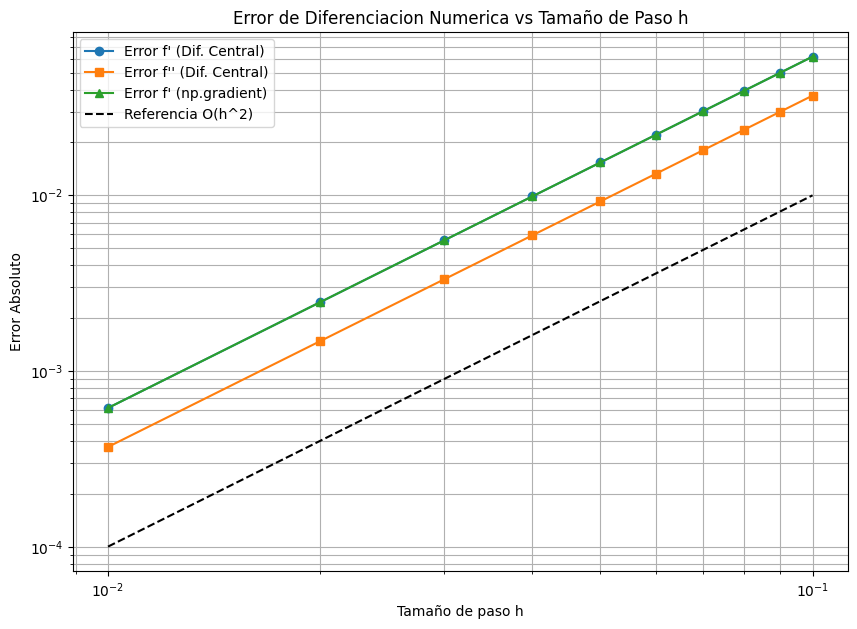


--- Busqueda del h optimo para f'(x) ---
El valor optimo de 'h' encontrado es aproximadamente 5.94e-06
Con este 'h', el error minimo alcanzado fue de 1.50e-11
Este punto representa el mejor balance entre el error de truncamiento (que disminuye con h) y el error de redondeo (que aumenta al disminuir h).


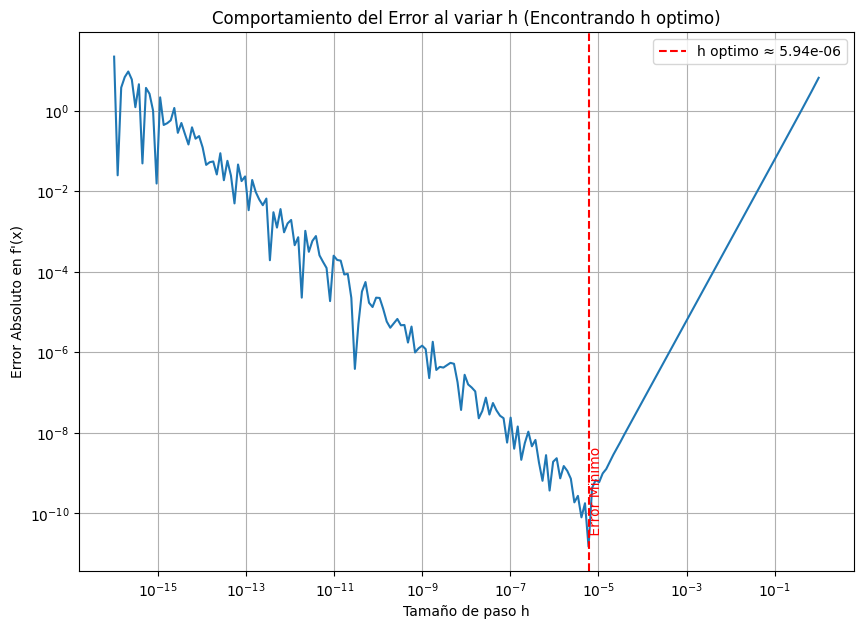

In [8]:
# --- 1. Configuracion de Funciones y Constantes ---

# se define la funcion f(x) y su variable 'x' de forma simbolica con sympy
x_simbolico = sp.Symbol('x')
funcion_simbolica = x_simbolico * sp.exp(x_simbolico)

# se calculan la primera y segunda derivada de forma exacta usando sympy
derivada_1_simbolica = sp.diff(funcion_simbolica, x_simbolico)
derivada_2_simbolica = sp.diff(funcion_simbolica, x_simbolico, 2)

# se convierten las expresiones simbolicas a funciones numericas rapidas con lambdify
# esto nos permite evaluarlas eficientemente con numeros y arrays de numpy
funcion_g = sp.lambdify(x_simbolico, funcion_simbolica, 'numpy')
derivada_g1_exacta = sp.lambdify(x_simbolico, derivada_1_simbolica, 'numpy')
derivada_g2_exacta = sp.lambdify(x_simbolico, derivada_2_simbolica, 'numpy')

# punto de evaluacion
punto_x0 = 2.0

# se calculan los valores exactos para usarlos como referencia
valor_exacto_g1 = derivada_g1_exacta(punto_x0)
valor_exacto_g2 = derivada_g2_exacta(punto_x0)

print(f"--- Valores Exactos en x = {punto_x0} ---")
print(f"Valor exacto de f'(x): {valor_exacto_g1:.6f}")
print(f"Valor exacto de f''(x): {valor_exacto_g2:.6f}")

# --- 2. Comparacion de Errores con h variable ---

# se definen las formulas de diferencias finitas centrales (orden O(h^2))
derivada_central_g1 = lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h)
derivada_central_g2 = lambda f, x, h: (f(x + h) - 2*f(x) + f(x - h)) / (h**2)

# se define el rango de h para la comparacion
valores_h = np.linspace(0.01, 0.1, 10)

# listas para almacenar los errores de cada metodo
errores_df_g1 = [] # error para f' con diferencia finita
errores_df_g2 = [] # error para f'' con diferencia finita
errores_gradient = [] # error para f' con np.gradient

for h_actual in valores_h:
    # calculo con diferencia finita
    aprox_g1 = derivada_central_g1(funcion_g, punto_x0, h_actual)
    aprox_g2 = derivada_central_g2(funcion_g, punto_x0, h_actual)
    errores_df_g1.append(np.abs(aprox_g1 - valor_exacto_g1))
    errores_df_g2.append(np.abs(aprox_g2 - valor_exacto_g2))

    # calculo con numpy.gradient (necesita un array)
    puntos_x_np = np.array([punto_x0 - h_actual, punto_x0, punto_x0 + h_actual])
    puntos_y_np = funcion_g(puntos_x_np)
    # np.gradient calcula la derivada en cada punto, tomamos la del centro
    derivada_np = np.gradient(puntos_y_np, h_actual)
    errores_gradient.append(np.abs(derivada_np[1] - valor_exacto_g1))

# --- Grafica Logaritmica de Errores ---
plt.figure(figsize=(10, 7))
plt.loglog(valores_h, errores_df_g1, 'o-', label="Error f' (Dif. Central)")
plt.loglog(valores_h, errores_df_g2, 's-', label="Error f'' (Dif. Central)")
plt.loglog(valores_h, errores_gradient, '^-', label="Error f' (np.gradient)")
plt.loglog(valores_h, valores_h**2, 'k--', label='Referencia O(h^2)') # la teoria predice O(h^2)
plt.title("Error de Diferenciacion Numerica vs Tamaño de Paso h")
plt.xlabel("Tamaño de paso h")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True, which='both')
plt.show()

# --- 3. Busqueda del Valor Optimo de h ---
print("\n--- Busqueda del h optimo para f'(x) ---")
# para encontrar el h optimo, se prueba con un rango mucho mas amplio y pequeño de h
h_para_optimizar = np.logspace(0, -16, 200) # h desde 1 down to 1e-16
errores_para_optimizar = []

for h_actual in h_para_optimizar:
    aprox_g1 = derivada_central_g1(funcion_g, punto_x0, h_actual)
    errores_para_optimizar.append(np.abs(aprox_g1 - valor_exacto_g1))

# se encuentra el h que minimizo el error
error_minimo = np.min(errores_para_optimizar)
h_optimo = h_para_optimizar[np.argmin(errores_para_optimizar)]

print(f"El valor optimo de 'h' encontrado es aproximadamente {h_optimo:.2e}")
print(f"Con este 'h', el error minimo alcanzado fue de {error_minimo:.2e}")
print("Este punto representa el mejor balance entre el error de truncamiento (que disminuye con h) y el error de redondeo (que aumenta al disminuir h).")

# se grafica el comportamiento del error para visualizar el h optimo
plt.figure(figsize=(10, 7))
plt.loglog(h_para_optimizar, errores_para_optimizar)
plt.title("Comportamiento del Error al variar h (Encontrando h optimo)")
plt.xlabel("Tamaño de paso h")
plt.ylabel("Error Absoluto en f'(x)")
plt.axvline(h_optimo, color='r', linestyle='--', label=f'h optimo ≈ {h_optimo:.2e}')
plt.text(h_optimo, error_minimo*1.5, ' Error Minimo', color='r', rotation=90, verticalalignment='bottom')
plt.grid(True, which="both")
plt.legend()
plt.show()